In [151]:
import pandas as pd

# Replace 'your_data_file.DATA' and 'your_csv_file.csv' with actual file paths
column_names = ["Age", "Work_class", "Final_Weight", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship",
                "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Native_Country", "Income"]

adult = pd.read_csv('F:\\IIT Platforms\\Second Year\\2 semester\\CM2604 Machine Learning\\Income-Prediction\\Dataset\\adult.data', delimiter=',', names=column_names)  # Adjust delimiter if needed
adult.to_csv('adult.csv', index=False)
adult_data = pd.read_csv("adult.csv")
adult_data.head(100)

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [152]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work_class      32561 non-null  object
 2   Final_Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [153]:
adult_data.nunique()

Age                  73
Work_class            9
Final_Weight      21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_per_Week       94
Native_Country       42
Income                2
dtype: int64

In [154]:
# Print unique values for each column
for column in adult_data.columns:
    unique_values = adult_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

Age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Work_class unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Final_Weight unique values:
[ 77516  83311 215646 ...  34066  84661 257302]


Education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Education_Num unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Marital_Status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handler

In [155]:
# Replace '?' with NaN in the 'Work_class' column
adult_data['Work_class'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Work_class' column
adult_data = adult_data.dropna(subset=['Work_class'])

# Print unique values for the 'Work_class' column after removing '?'
print("Work_class unique values after removing '?':")
print(adult_data['Work_class'].unique())

Work_class unique values after removing '?':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [156]:
# Replace '?' with NaN in the 'Occupation' column
adult_data['Occupation'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Occupation' column
adult_data = adult_data.dropna(subset=['Occupation'])

# Print unique values for the 'Occupation' column after removing '?'
print("Occupation unique values after removing '?':")
print(adult_data['Occupation'].unique())

Occupation unique values after removing '?':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [157]:
# Replace '?' with NaN in the 'Native_Country' column
adult_data['Native_Country'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Native_Country' column
adult_data = adult_data.dropna(subset=['Native_Country'])

# Print unique values for the 'Native_Country' column after removing '?'
print("Native_Country unique values after removing '?':")
print(adult_data['Native_Country'].unique())

Native_Country unique values after removing '?':
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [158]:
# Calculate the mean of 'Capital_Loss' excluding 0 values
mean_capital_loss = adult_data[adult_data['Capital_Loss'] != 0]['Capital_Loss'].mean()

# Replace 0 values in 'Capital_Loss' with the calculated mean
adult_data['Capital_Loss'] = adult_data['Capital_Loss'].replace(0, mean_capital_loss)

# Print the mean value and updated 'Capital_Loss' column
print(f"Mean value of 'Capital_Loss' (excluding 0 values): {mean_capital_loss}")
print("\nUpdated 'Capital_Loss' column:")
print(adult_data['Capital_Loss'])
print(adult_data['Capital_Loss'].unique())

Mean value of 'Capital_Loss' (excluding 0 values): 1867.8983882270497

Updated 'Capital_Loss' column:
0        1867.898388
1        1867.898388
2        1867.898388
3        1867.898388
4        1867.898388
            ...     
32556    1867.898388
32557    1867.898388
32558    1867.898388
32559    1867.898388
32560    1867.898388
Name: Capital_Loss, Length: 30162, dtype: float64
[1867.89838823 2042.         1408.         1902.         1887.
 1719.         1762.         1564.         2179.         1816.
 1980.         1977.         1876.         1340.         2206.
 1741.         1485.         2339.         2415.         1380.
 1721.         2051.         2377.         1669.         2352.
 1672.          653.         2392.         1504.         1590.
 1651.         1628.         1848.         2001.         1740.
 2002.         1579.         2258.         1602.         2547.
 2205.         1726.         2444.         1138.         2238.
  625.          213.         1539.          880.  

In [159]:
# Calculate the mean of 'Capital_Gain' excluding 0 values
mean_capital_gain = adult_data[adult_data['Capital_Gain'] != 0]['Capital_Gain'].mean()

# Replace 0 values in 'Capital_Gain' with the calculated mean
adult_data['Capital_Gain'] = adult_data['Capital_Gain'].replace(0, mean_capital_gain)

# Print the mean value and updated 'Capital_Gain' column
print(f"Mean value of 'Capital_Gain' (excluding 0 values): {mean_capital_gain}")
print("\nUpdated 'Capital_Gain' column:")
print(adult_data['Capital_Gain'])
print(adult_data['Capital_Gain'].unique())


Mean value of 'Capital_Gain' (excluding 0 values): 12977.596926713948

Updated 'Capital_Gain' column:
0         2174.000000
1        12977.596927
2        12977.596927
3        12977.596927
4        12977.596927
             ...     
32556    12977.596927
32557    12977.596927
32558    12977.596927
32559    12977.596927
32560    15024.000000
Name: Capital_Gain, Length: 30162, dtype: float64
[ 2174.         12977.59692671 14084.          5178.
  5013.          2407.         14344.         15024.
  7688.          4064.          4386.          7298.
  1409.          3674.          1055.          2050.
  2176.           594.         20051.          6849.
  4101.          8614.          3411.          2597.
 25236.          4650.          2463.          3103.
 10605.          2964.          3325.          2580.
  3471.          4865.         99999.          6514.
  1471.          2329.          2105.          2885.
 10520.          2202.          2961.         27828.
  6767.          2228. 

In [160]:
adult_data.drop_duplicates()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1867.898388,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12977.596927,1867.898388,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12977.596927,1867.898388,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,12977.596927,1867.898388,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,12977.596927,1867.898388,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,12977.596927,1867.898388,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,12977.596927,1867.898388,20,United-States,<=50K


In [161]:
adult_data.head(100)

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,1867.898388,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,12977.596927,1867.898388,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,12977.596927,1867.898388,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,12977.596927,1867.898388,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20,Private,188300,Some-college,10,Never-married,Tech-support,Own-child,White,Female,12977.596927,1867.898388,40,United-States,<=50K
104,29,Private,103432,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,12977.596927,1867.898388,40,United-States,<=50K
105,32,Self-emp-inc,317660,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688.000000,1867.898388,40,United-States,>50K
107,30,Private,194901,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,12977.596927,1867.898388,40,United-States,<=50K


In [162]:
# Sort the DataFrame by the 'Age' column in ascending order
adult_data = adult_data.sort_values(by='Age')

# Display the sorted DataFrame
adult_data.head()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
10180,17,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,12977.596927,1867.898388,9,United-States,<=50K
21767,17,Private,207637,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,12977.596927,1867.898388,10,United-States,<=50K
14720,17,Private,99462,11th,7,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,12977.596927,1867.898388,20,United-States,<=50K
13322,17,Private,345403,10th,6,Never-married,Other-service,Own-child,White,Male,12977.596927,1867.898388,40,United-States,<=50K
26088,17,Private,225507,11th,7,Never-married,Handlers-cleaners,Not-in-family,Black,Female,12977.596927,1867.898388,15,United-States,<=50K


In [163]:
# Assuming you have already read the data into 'adult_data' DataFrame
missing_values = adult_data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age               0
Work_class        0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_Week    0
Native_Country    0
Income            0
dtype: int64


In [164]:
for column in adult_data.columns:
    unique_values = adult_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

Age unique values:
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90]


Work_class unique values:
[' Private' ' Self-emp-not-inc' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' State-gov' ' Without-pay']


Final_Weight unique values:
[297246 207637  99462 ... 221832  40388 139660]


Education unique values:
[' 11th' ' 10th' ' 12th' ' HS-grad' ' 9th' ' 5th-6th' ' Some-college'
 ' 7th-8th' ' Masters' ' Assoc-voc' ' Preschool' ' 1st-4th' ' Bachelors'
 ' Assoc-acdm' ' Doctorate' ' Prof-school']


Education_Num unique values:
[ 7  6  8  9  5  3 10  4 14 11  1  2 13 12 16 15]


Marital_Status unique values:
[' Never-married' ' Married-civ-spouse' ' Married-spouse-absent'
 ' Divorced' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation unique values:
[' Priv-house-serv' ' Handlers-cleaners' ' Other-service' ' Sales'
 ' 

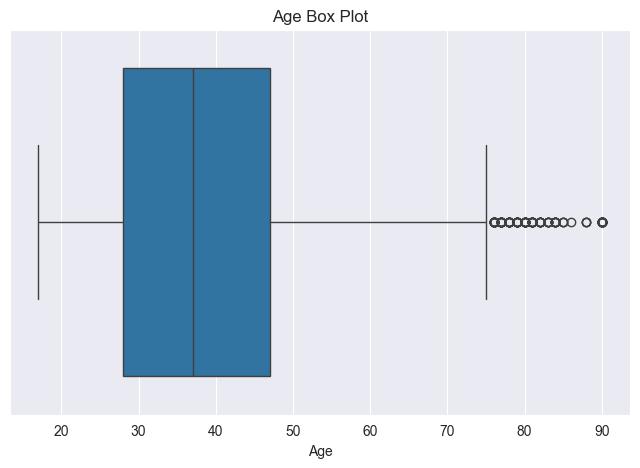

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the "Age" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Age"])
plt.title("Age Box Plot")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_612\874506997.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '38.153609933575886' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adult_data.loc[adult_data["Age"] > 75, "Age"] = age_mean_below_70


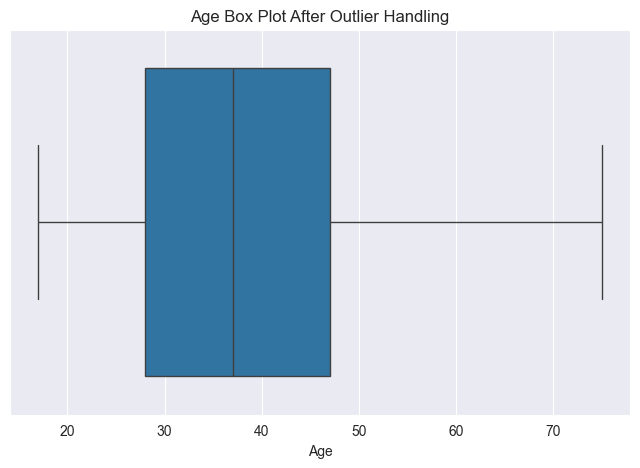

In [166]:
# Handle outliers by replacing values above 70 with the mean of values below 70
age_mean_below_70 = adult_data.loc[adult_data["Age"] < 75, "Age"].mean()
adult_data.loc[adult_data["Age"] > 75, "Age"] = age_mean_below_70

# Create a box plot for the "Age" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Age"])
plt.title("Age Box Plot After Outlier Handling")
plt.show()

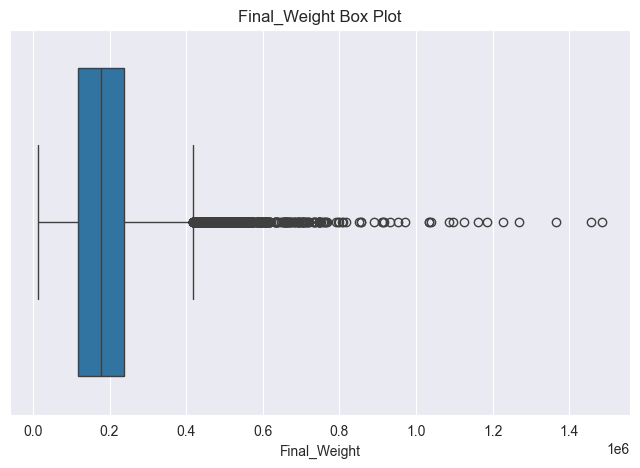

In [167]:
# Create a box plot for the "Final_Weight" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Final_Weight"])
plt.title("Final_Weight Box Plot")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_612\3265528332.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '189793.83393011073' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adult_data.loc[adult_data["Final_Weight"] > outlier_threshold, "Final_Weight"] = final_weight_mean


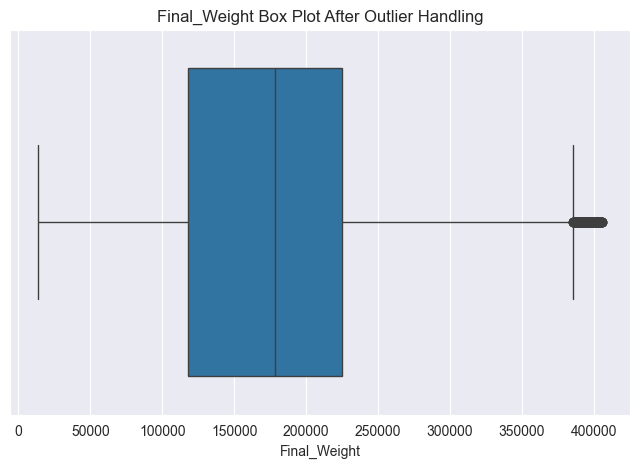

In [168]:
# Handle outliers by replacing values above 1.4 times the IQR with the mean of all values
Q1 = adult_data["Final_Weight"].quantile(0.25)
Q3 = adult_data["Final_Weight"].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.4 * IQR

final_weight_mean = adult_data["Final_Weight"].mean()
adult_data.loc[adult_data["Final_Weight"] > outlier_threshold, "Final_Weight"] = final_weight_mean

# Create a box plot for the "Final_Weight" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Final_Weight"])
plt.title("Final_Weight Box Plot After Outlier Handling")
plt.show()

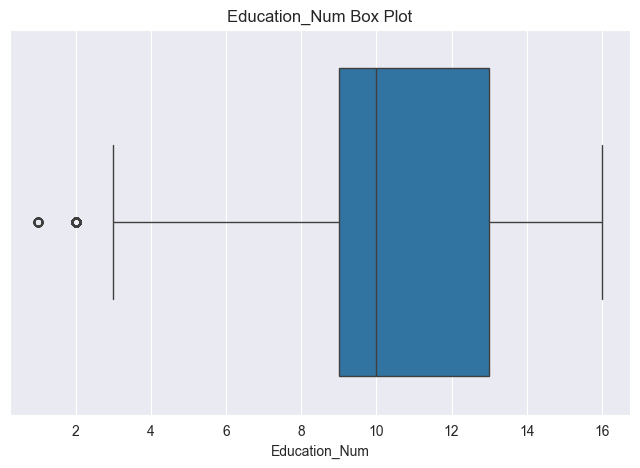

In [169]:
 # Create a box plot for the "Education_Num" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Education_Num"])
plt.title("Education_Num Box Plot")
plt.show()

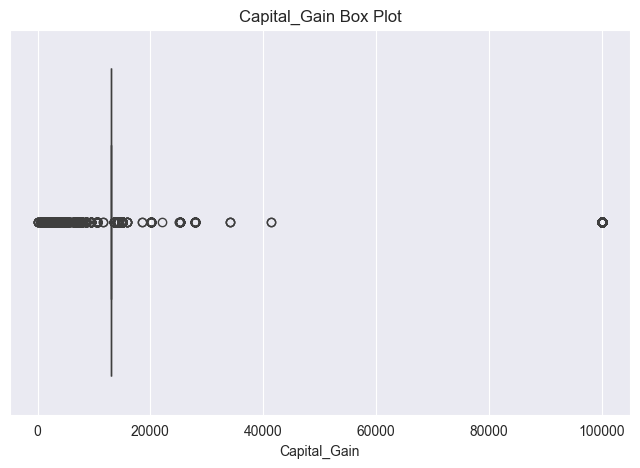

In [170]:
# Create a box plot for the "Capital_Gain" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Capital_Gain"])
plt.title("Capital_Gain Box Plot")
plt.show()

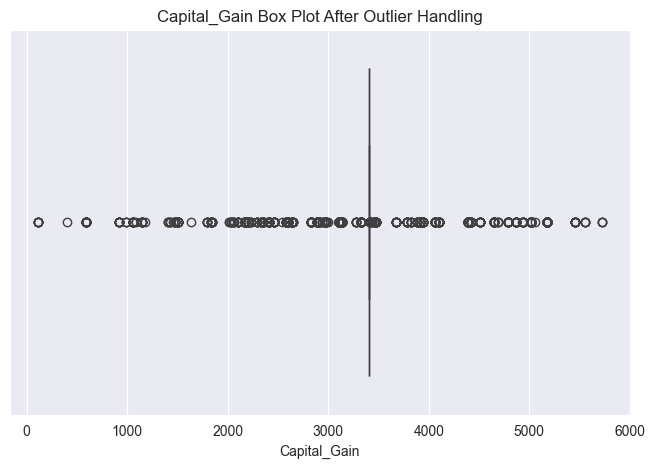

In [171]:
# Handle outliers by replacing values above 6000 with the mean of values below that threshold
outlier_threshold = 6000

capital_gain_mean_below_threshold = adult_data.loc[adult_data["Capital_Gain"] <= outlier_threshold, "Capital_Gain"].mean()
adult_data.loc[adult_data["Capital_Gain"] > outlier_threshold, "Capital_Gain"] = capital_gain_mean_below_threshold

# Create a box plot for the "Capital_Gain" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Capital_Gain"])
plt.title("Capital_Gain Box Plot After Outlier Handling")
plt.show()

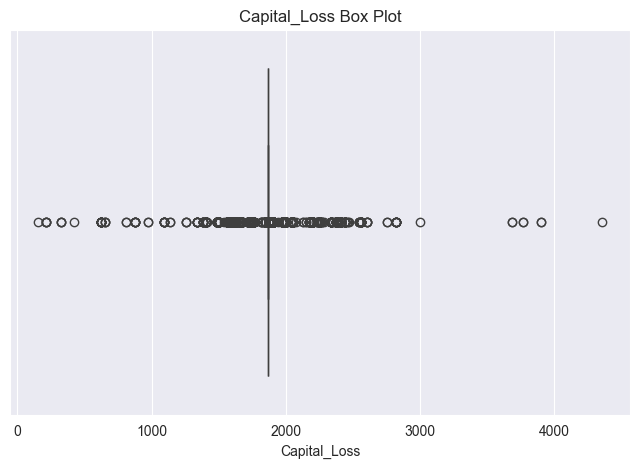

In [172]:
# Create a box plot for the "Capital_Loss" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Capital_Loss"])
plt.title("Capital_Loss Box Plot")
plt.show()

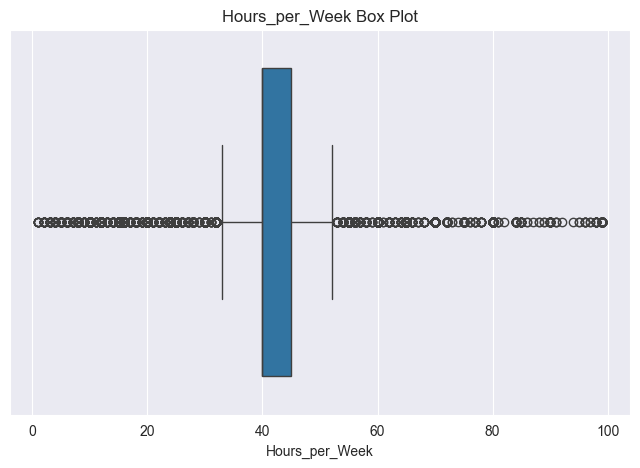

In [173]:
# Create a box plot for the "Hours_per_Week" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult_data["Hours_per_Week"])
plt.title("Hours_per_Week Box Plot")
plt.show()

In [174]:
adult_data.head()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
10180,17.0,Private,297246.0,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,3406.736751,1867.898388,9,United-States,<=50K
21767,17.0,Private,207637.0,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,3406.736751,1867.898388,10,United-States,<=50K
14720,17.0,Private,99462.0,11th,7,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,3406.736751,1867.898388,20,United-States,<=50K
13322,17.0,Private,345403.0,10th,6,Never-married,Other-service,Own-child,White,Male,3406.736751,1867.898388,40,United-States,<=50K
26088,17.0,Private,225507.0,11th,7,Never-married,Handlers-cleaners,Not-in-family,Black,Female,3406.736751,1867.898388,15,United-States,<=50K


In [175]:
print(adult_data.dtypes)

Age               float64
Work_class         object
Final_Weight      float64
Education          object
Education_Num       int64
Marital_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_Week      int64
Native_Country     object
Income             object
dtype: object


In [176]:
# Assuming 'adult_data' is your DataFrame

# One-hot encode categorical columns
categorical_columns = ['Work_class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country']
adult_data_encoded = pd.get_dummies(adult_data, columns=categorical_columns, drop_first=True)

# Save the DataFrame to a CSV file
adult_data_encoded.to_csv('adult_data_encoded.csv', index=False)

In [177]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
# Load the preprocessed data
# You can replace 'path_to_your_data.csv' with the actual path to your preprocessed dataset
data = pd.read_csv('adult_data_encoded.csv')

# Use label encoding for the 'Income' column
label_encoder = LabelEncoder()
data['Income'] = label_encoder.fit_transform(data['Income'])


# Assuming your target variable is 'Income' and features are all other columns
X = data.drop('Income', axis=1)
y = data['Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:")
print(classification_report(y_test, nb_predictions))

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Naïve Bayes Classifier:
Accuracy: 0.7755677109232554
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      4507
           1       0.68      0.21      0.32      1526

    accuracy                           0.78      6033
   macro avg       0.73      0.59      0.59      6033
weighted avg       0.76      0.78      0.73      6033

Random Forest Classifier:
Accuracy: 0.8291065804740594
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4507
           1       0.70      0.57      0.63      1526

    accuracy                           0.83      6033
   macro avg       0.78      0.74      0.76      6033
weighted avg       0.82      0.83      0.82      6033


In [178]:
import numpy as np
# Calculate MAE and RMSE for Naïve Bayes predictions
mae_nb = mean_absolute_error(y_test, nb_predictions)
rmse_nb = np.sqrt(mean_squared_error(y_test, nb_predictions))
print("MAE for Naïve Bayes:", mae_nb)
print("RMSE for Naïve Bayes:", rmse_nb)

# Calculate MAE and RMSE for Random Forest predictions
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("MAE for Random Forest:", mae_rf)
print("RMSE for Random Forest:", rmse_rf)

MAE for Naïve Bayes: 0.22443228907674456
RMSE for Naïve Bayes: 0.4737428512143952
MAE for Random Forest: 0.17089341952594067
RMSE for Random Forest: 0.4133925731383435
